# ARIMA Model Tutorial
This notebook is a simple tutorial for fitting an ARIMA model in Python, loosely following the steps at https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/.

In [30]:
# Packages
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import pmdarima as pm

In [31]:
# Simulate an AR(1) process
T = 10000
rho = 0.5
epsilon = np.random.normal(0,1,T)
X = np.empty([T,1])
X[0] = epsilon[0]
for i in range(1,T):
    X[i] = rho*X[i-1] + epsilon[i]

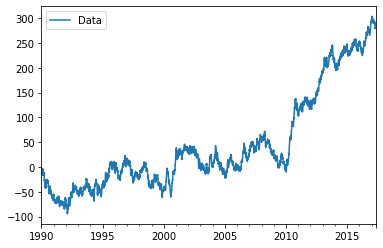

In [32]:
# Convert into a pandas dts
X = pd.DataFrame(X, columns=['Data'], index=pd.DatetimeIndex(pd.date_range(start='1/1/1990',periods=T)))
X['Data'] = X['Data'].cumsum()
X.plot()


In [33]:
# Fit the ARIMA model
model = pm.auto_arima(X, seasonal=False)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -14163.808
Date:                Thu, 22 Jul 2021   AIC                          28333.616
Time:                        19:12:08   BIC                          28355.247
Sample:                             0   HQIC                         28340.938
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0142      0.010      1.421      0.155      -0.005       0.034
ar.L1          0.4998      0.009     57.399      0.000       0.483       0.517
sigma2         0.9951      0.014     71.292      0.000       0.968       1.022
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.83   Prob(JB):                         0.77
Heteroskedasticity (H):               1.01   Skew:                             0.00
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Data,Fit
1990-01-01,-0.981293,0.028362
1990-01-02,-3.206370,-0.952932
1990-01-03,-3.332543,-4.304243
1990-01-04,-2.722876,-3.381415
1990-01-05,-2.681342,-2.403987
...,...,...
2017-05-14,289.060346,288.019298
2017-05-15,288.066715,290.398185
2017-05-16,288.232607,287.584300
2017-05-17,286.676260,288.329703


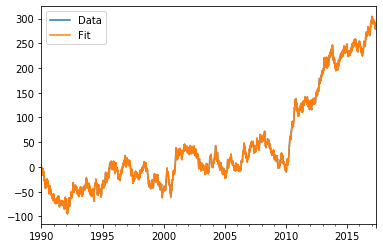

In [36]:
Y = X
Y['Fit'] = model.predict_in_sample()
Y.plot()
Y